# Visualize geospatial parameters before and after remapping


In [82]:
# modules
import os
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

#### Control file handling

In [83]:
# Easy access to control file folder
controlFolder = Path('../0_control_files')

In [84]:
# Store the name of the 'active' file in a variable
controlFile = 'control_active.txt'

In [85]:
# Function to extract a given setting from the control file
def read_from_control( file, setting ):
    
    # Open 'control_active.txt' and ...
    with open(file) as contents:
        for line in contents:
            
            # ... find the line with the requested setting
            if setting in line and not line.startswith('#'):
                break
    
    # Extract the setting's value
    substring = line.split('|',1)[1]      # Remove the setting's name (split into 2 based on '|', keep only 2nd part)
    substring = substring.split('#',1)[0] # Remove comments, does nothing if no '#' is found
    substring = substring.strip()         # Remove leading and trailing whitespace, tabs, newlines
       
    # Return this value    
    return substring

In [87]:
# Function to specify a default path
def make_default_path(suffix):
    
    # Get the root path
    rootPath = Path( read_from_control(controlFolder/controlFile,'root_path') )
    
    # Get the domain folder
    domainName = read_from_control(controlFolder/controlFile,'domain_name')
    domainFolder = 'domain_' + domainName
    
    # Specify the forcing path
    defaultPath = rootPath / domainFolder / suffix
    
    return defaultPath

#### Define where to save the figure

In [66]:
# Path and filename
fig_path = read_from_control(controlFolder/controlFile,'visualization_folder')
fig_name = 'geospatial_fields_remapping_v2.png'

# Specify default path if needed
if fig_path == 'default':
    fig_path = make_default_path('visualization') # outputs a Path()
else:
    fig_path = Path(fig_path) # make sure a user-specified path is a Path()
    
# Make the folder if it doesn't exist
fig_path.mkdir(parents=True, exist_ok=True)

#### Find location the catchment shapefile

In [67]:
# HRU fieldname - this is the same for all three shapefiles
shp_hru = read_from_control(controlFolder/controlFile,'catchment_shp_hruid')

In [68]:
# Path & name
catchment_path = read_from_control(controlFolder/controlFile,'catchment_shp_path')
catchment_name = read_from_control(controlFolder/controlFile,'catchment_shp_name')

In [69]:
# Specify default path if needed
if catchment_path == 'default':
    catchment_path = make_default_path('shapefiles/catchment') # outputs a Path()
else:
    catchment_path = Path(catchment_path) # make sure a user-specified path is a Path()

#### Find location of source .tifs

In [70]:
# DEM path & name
dem_path = read_from_control(controlFolder/controlFile,'parameter_dem_tif_path')
dem_name = read_from_control(controlFolder/controlFile,'parameter_dem_tif_name')

# Specify default path if needed
if dem_path == 'default':
    dem_path = make_default_path('parameters/dem/5_elevation') # outputs a Path()
else:
    dem_path = Path(dem_path) # make sure a user-specified path is a Path()

In [71]:
# Soil path & name
soil_path = read_from_control(controlFolder/controlFile,'parameter_soil_domain_path')
soil_name = read_from_control(controlFolder/controlFile,'parameter_soil_tif_name')

# Specify default path if needed
if soil_path == 'default':
    soil_path = make_default_path('parameters/soilclass/2_soil_classes_domain') # outputs a Path()
else:
    soil_path = Path(soil_path) # make sure a user-specified path is a Path()

In [72]:
# Land path & name
land_path = read_from_control(controlFolder/controlFile,'parameter_land_mode_path')
land_name = read_from_control(controlFolder/controlFile,'parameter_land_tif_name')

# Specify default path if needed
if land_path == 'default':
    land_path = make_default_path('parameters/landclass/7_mode_land_class') # outputs a Path()
else:
    land_path = Path(land_path) # make sure a user-specified path is a Path()

#### Find location of the attributes file

In [73]:
# attributes path & name
att_path = read_from_control(controlFolder/controlFile,'settings_summa_path')
att_name = read_from_control(controlFolder/controlFile,'settings_summa_attributes')

In [74]:
# Specify default path if needed
if att_path == 'default':
    att_path = make_default_path('settings/SUMMA') # outputs a Path()
else:
    att_path = Path(att_path) # make sure a user-specified path is a Path()

#### Load the shapefiles and the data

In [75]:
# shapefile
catchment = gpd.read_file(catchment_path/catchment_name)

In [76]:
# tifs
dem = rxr.open_rasterio(dem_path/dem_name)
soil = rxr.open_rasterio(soil_path/soil_name)
land = rxr.open_rasterio(land_path/land_name)

In [77]:
# attributes
att = xr.open_dataset(att_path/att_name)

#### Map attributes data to catchment HRUs

In [78]:
# Elevation
if (att['hruId'] == catchment[shp_hru]).all():
    catchment['plot_elev'] = att['elevation']
    catchment['plot_soil'] = att['soilTypeIndex']
    catchment['plot_land'] = att['vegTypeIndex']

ImportError: cannot import name '_new_to_legacy_freq' from 'xarray.coding.cftime_offsets' (/Users/darrieythorsson/compHydro/data/CAMELS_spat/camels-spat-env/lib/python3.11/site-packages/xarray/coding/cftime_offsets.py)

#### Plot settings and plotting data prep

In [36]:
# Number of classes for land and soil
n_land = 17
n_soil = 12

In [37]:
# Colors
cmap_dem = 'Greys_r'
#cmap_soil = plt.get_cmap('YlOrBr',n_soil)
cmap_soil = plt.get_cmap('tab20c',n_soil)
cmap_soil.set_under('w')
#cmap_land = plt.get_cmap('Greens',n_land)
cmap_land = plt.get_cmap('tab20c',n_land)
cmap_land.set_under('w')

In [38]:
# color limits
vmin_dem,vmax_dem = dem.min(),dem.max()
vmin_soil,vmax_soil = 1-0.5,n_soil+0.5 # slightly hacky way to get the labels for discrete classes in the right locations
vmin_land,vmax_land = 1-0.5,n_land+0.5 

NameError: name 'dem' is not defined

In [39]:
# colorbar settings
ticks_soil = range(n_soil+1)
ticks_land = range(n_land+1)

#### Create the figure

In [40]:
plt.rcParams.update({'font.size': 16})

NameError: name 'dem' is not defined

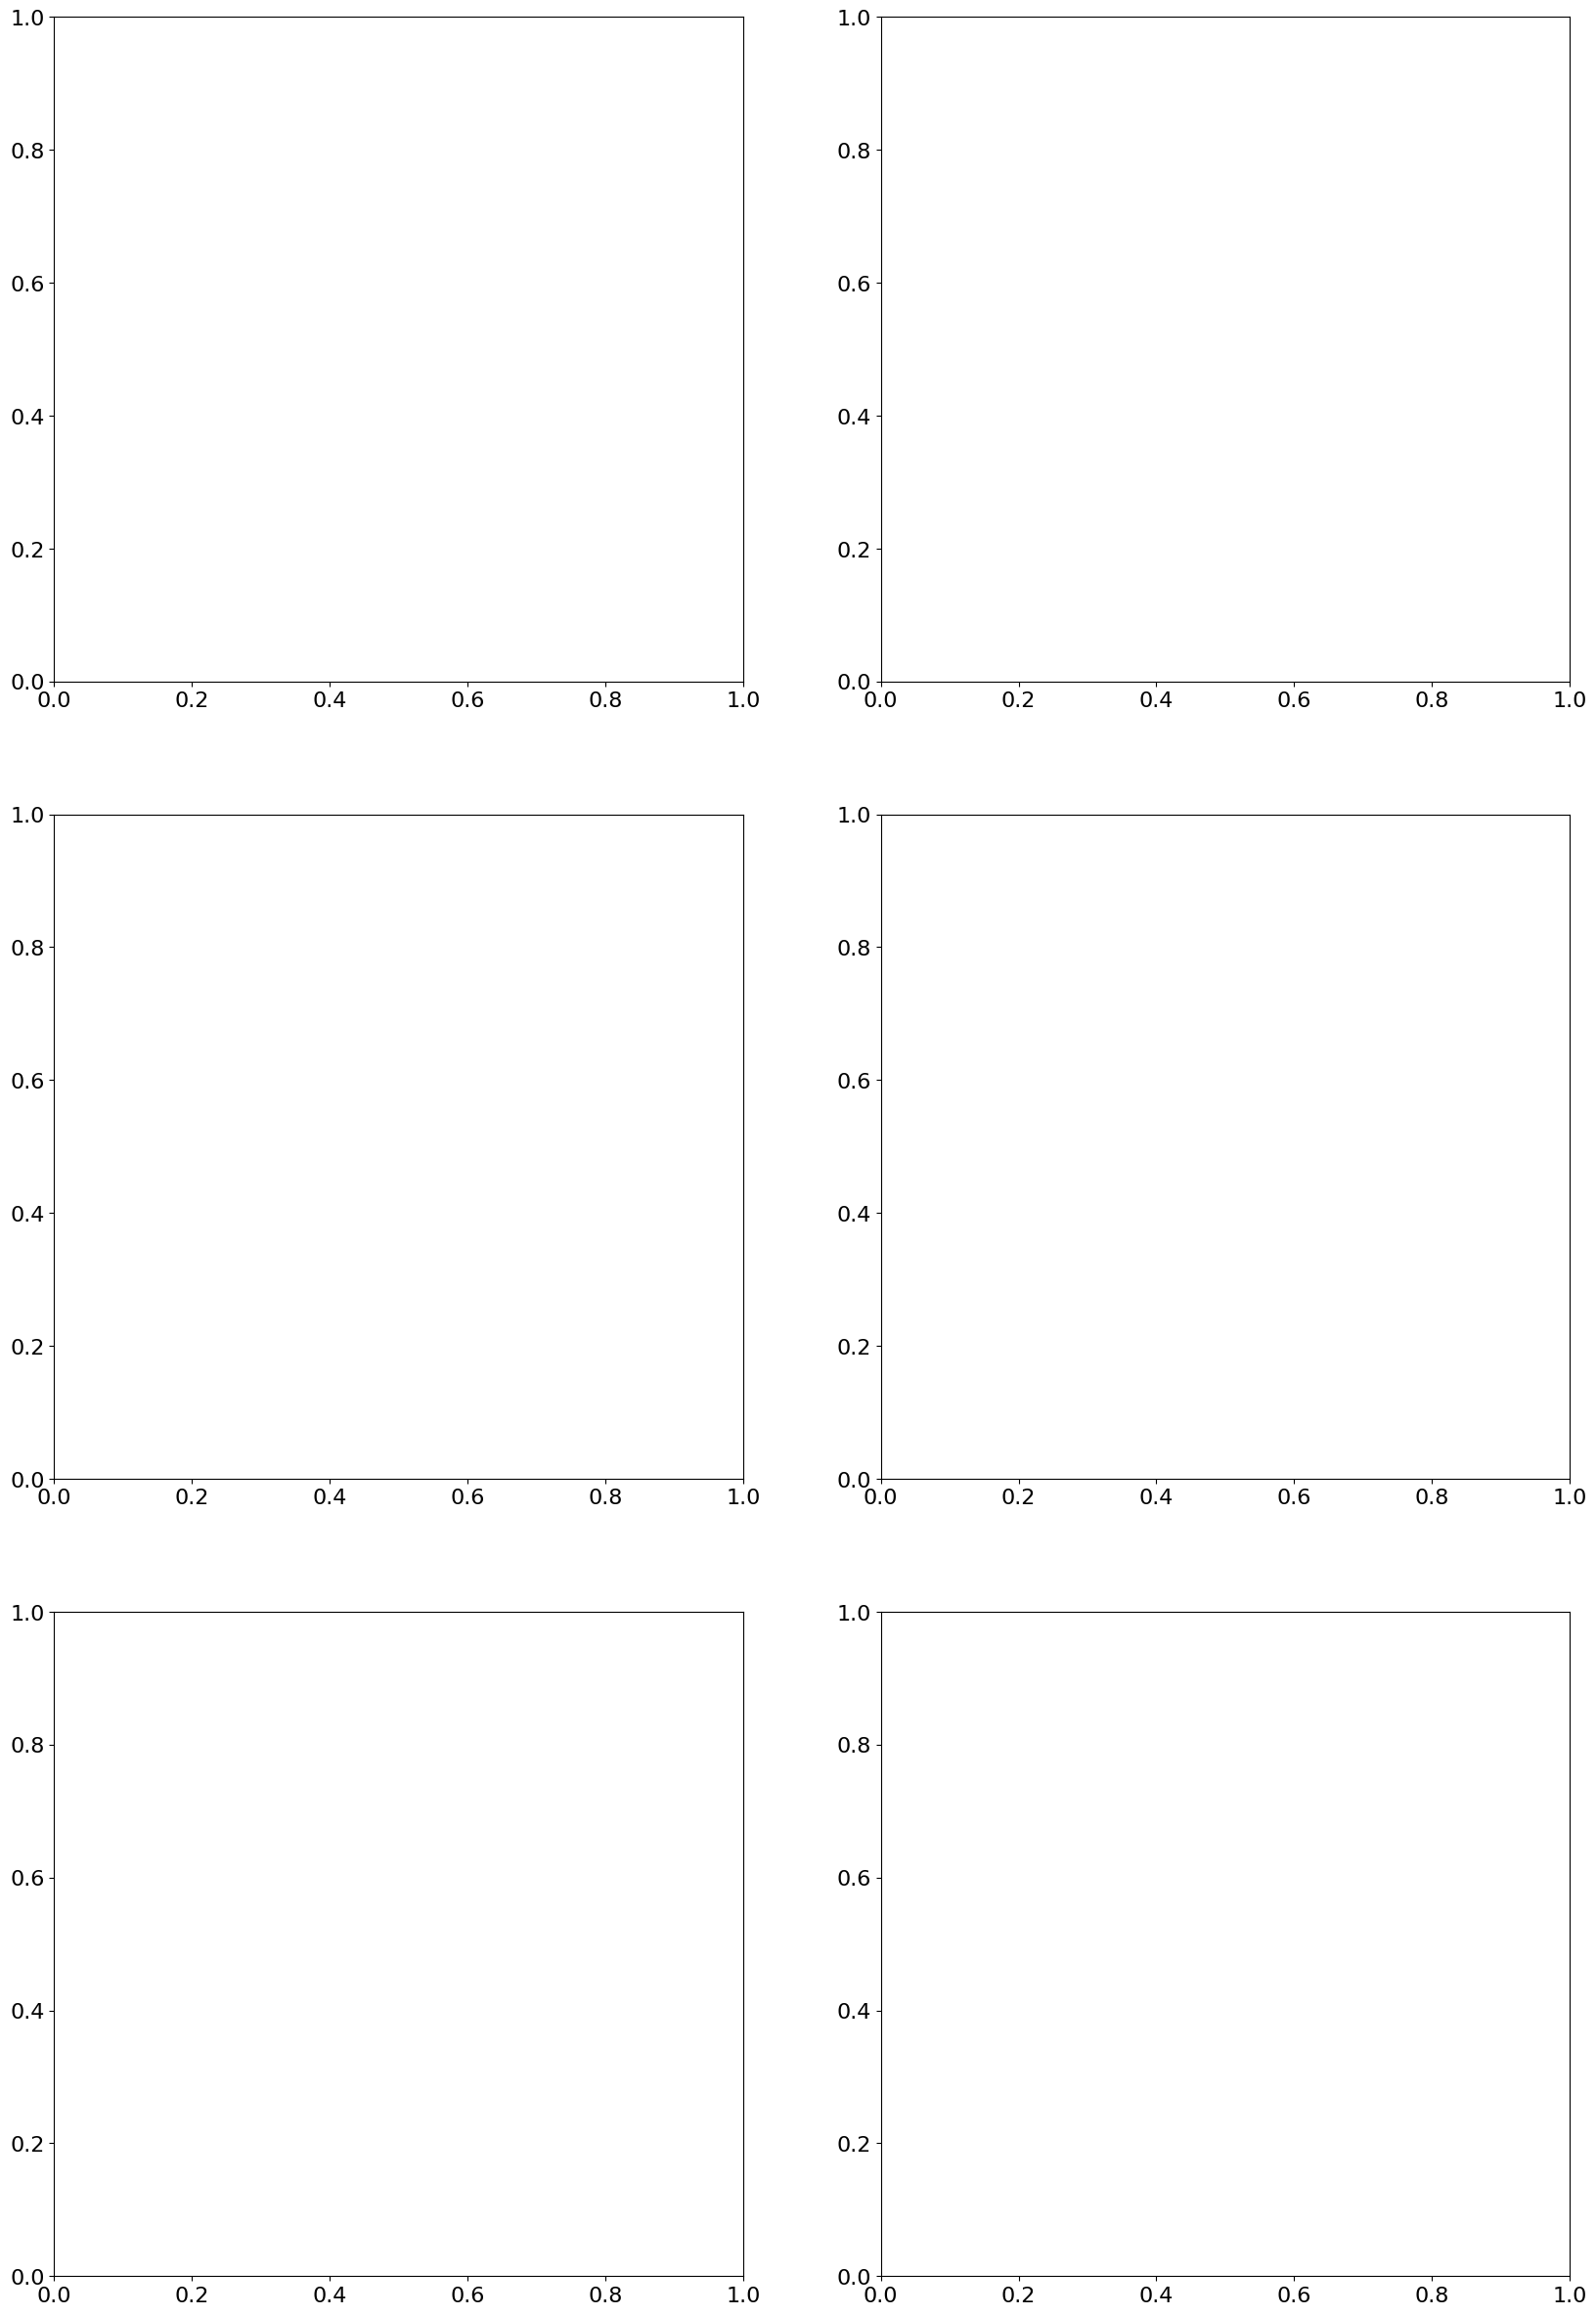

In [41]:
fig, axs = plt.subplots(3,2,figsize=(20,30))
axs = axs.flatten()
cbar_scale = 0.97
cbar_font = 14

# --- DEM
# source data + catchment
axId = 0
h = dem.sel(band=1).plot(cmap=cmap_dem, ax=axs[axId], vmin=vmin_dem, vmax=vmax_dem, cbar_kwargs={'shrink': cbar_scale})
catchment.plot(color='None', edgecolor='k', ax=axs[axId]);
axs[axId].set_ylabel('Latitude [degrees North]')
axs[axId].set_xlabel('')
axs[axId].set_title('(a) Merit Hydro adjusted elevations')
h.colorbar.ax.set_title('[m.a.s.l.]', fontdict={'fontsize': cbar_font})

# source data + HRU mean
axId = 1
h = dem.sel(band=1).plot(cmap=cmap_dem, ax=axs[axId], vmin=vmin_dem, vmax=vmax_dem, cbar_kwargs={'shrink': cbar_scale})
catchment.plot(column='plot_elev', edgecolor='k', ax=axs[axId], cmap=cmap_dem, vmin=vmin_dem, vmax=vmax_dem);
axs[axId].set_ylabel('')
axs[axId].set_xlabel('')
axs[axId].set_title('(b) HRU-averaged elevation')
h.colorbar.ax.set_title('[m.a.s.l.]', fontdict={'fontsize': cbar_font})

# --- Soil
# source data + catchment
axId = 2
h = soil.sel(band=1).plot(cmap=cmap_soil, ax=axs[axId], vmin=vmin_soil, vmax=vmax_soil, cbar_kwargs={'shrink': cbar_scale})
catchment.plot(color='None', edgecolor='k', ax=axs[axId]);
axs[axId].set_ylabel('Latitude [degrees North]')
axs[axId].set_xlabel('')
axs[axId].set_title('(c) Soil texture classes')
h.colorbar.set_ticks(ticks_soil)
h.colorbar.ax.set_title('[-]', fontdict={'fontsize': cbar_font})

# add 'no data' to tick labels
tick_txt = []
tick_txt = [str(val) for val in ticks_soil]
tick_txt[0] = 'No data'
h.colorbar.ax.set_yticklabels(tick_txt)

# source data + HRU mean
axId = 3
h = soil.sel(band=1).plot(cmap=cmap_soil, ax=axs[axId], vmin=vmin_soil, vmax=vmax_soil, cbar_kwargs={'shrink': cbar_scale})
catchment.plot(column='plot_soil', edgecolor='k', ax=axs[axId], cmap=cmap_soil, vmin=vmin_soil, vmax=vmax_soil);
axs[axId].set_ylabel('')
axs[axId].set_xlabel('')
axs[axId].set_title('(d) Mode soil texture class per HRU')
h.colorbar.set_ticks(ticks_soil)
h.colorbar.ax.set_yticklabels(tick_txt)
h.colorbar.ax.set_title('[-]', fontdict={'fontsize': cbar_font})

# --- land
# source data + catchment
axId = 4
h = land.sel(band=1).plot(cmap=cmap_land, ax=axs[axId], vmin=vmin_land, vmax=vmax_land, cbar_kwargs={'shrink': cbar_scale})
catchment.plot(color='None', edgecolor='k', ax=axs[axId]);
axs[axId].set_ylabel('Latitude [degrees North]')
axs[axId].set_xlabel('Longitude [degrees East]')
axs[axId].set_title('(e) IGBP land classes')
h.colorbar.set_ticks(ticks_land)
h.colorbar.ax.set_title('[-]', fontdict={'fontsize': cbar_font})

# source data + HRU mean
axId = 5
h = land.sel(band=1).plot(cmap=cmap_land, ax=axs[axId], vmin=vmin_land, vmax=vmax_land, cbar_kwargs={'shrink': cbar_scale})
catchment.plot(column='plot_land', edgecolor='k', ax=axs[axId], cmap=cmap_land, vmin=vmin_land, vmax=vmax_land);
axs[axId].set_ylabel('')
axs[axId].set_xlabel('Longitude [degrees East]')
axs[axId].set_title('(f) Mode IGBP land class per HRU')
h.colorbar.set_ticks(ticks_land)
h.colorbar.ax.set_title('[-]', fontdict={'fontsize': cbar_font})

# save
plt.tight_layout()
plt.savefig(fig_path/fig_name, bbox_inches='tight', dpi=300)